In [29]:
# Importing the necessary Packages.
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from PIL import Image

In [30]:
from unsupervised.PCA_np import PCA
from unsupervised.SVD_np import SVD

In [31]:
 def load_dataset():   
    # Reading the dataset using Tensor Flow and keras.
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Reshaping the array to 4-dims so that it can work with the Keras API
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    # Making sure that the values are float so that we can get decimal points after division
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
    x_train /= 255
    x_test /= 255
    return x_train, x_test,y_test,y_train

In [32]:
def define_model(x_train,y_train):
    # Creating a Sequential Model and adding the layers
    input_shape= (28, 28, 1)
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train,y=y_train, epochs=5)
    return model


In [33]:
def model_prediction(model,array):
    pred = model.predict(array)
    return pred.argmax()


In [34]:
def read_imagen(imagen_name):
    number = Image.open(imagen_name).resize((28,28)).convert('L')
    number_array = np.asarray(number)
    number_array = number_array.reshape((1, 28, 28, 1))
    return number_array


In [35]:
x_train, x_test,y_test,y_train = load_dataset()
modelo = define_model(x_train,y_train)
imagen = read_imagen('img_108.jpg')
pred = model_prediction(modelo,imagen)

Epoch 1/5
1875/1875 [==============================] - 51s 25ms/step - loss: 4.8506 - accuracy: 0.1038
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 4.8520 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 4.8520 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 4.8520 - accuracy: 0.0987
Epoch 5/5
1/1 [==============================] - 0s 169ms/step


In [36]:
pred

0

In [37]:
Image.open('img_108.jpg').resize((28,28)).convert('L')

1/1 [==============================] - 0s 282ms/step
0


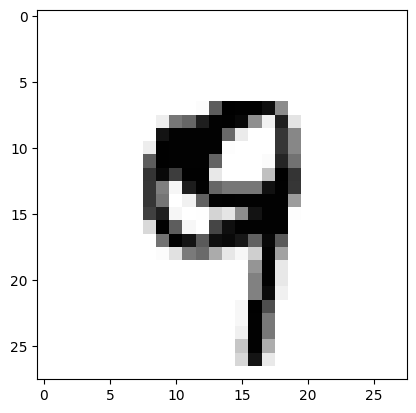

In [40]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = modelo.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [41]:
modelo.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 4.8520 - accuracy: 0.0980


[4.8520426750183105, 0.09799999743700027]